In [1]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import pandas as pd 
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 

In [5]:
 
#CLUSTERING MENGGUNAKAN K-MEANS¶ 
#ambil data 
data= pd.read_excel('daerah.xlsx') 
print(data) 

    No            Kota  Jumlah Penduduk (juta jiwa)  Luas Wilayah (km²)  \
0    1         Jakarta                         10.5                 662   
1    2        Surabaya                          2.9                 350   
2    3         Bandung                          2.5                 167   
3    4           Medan                          2.4                 265   
4    5        Makassar                          1.5                 199   
5    6        Semarang                          1.7                 373   
6    7      Yogyakarta                          0.4                  32   
7    8       Palembang                          1.6                 400   
8    9        Denpasar                          0.9                 127   
9   10      Balikpapan                          0.7                 503   
10  11     Banjarmasin                          0.6                  98   
11  12       Pontianak                          0.6                 107   
12  13           Batam   

Bagian data : 
[['Jakarta' 10.5 662]
 ['Surabaya' 2.9 350]
 ['Bandung' 2.5 167]
 ['Medan' 2.4 265]
 ['Makassar' 1.5 199]
 ['Semarang' 1.7 373]
 ['Yogyakarta' 0.4 32]
 ['Palembang' 1.6 400]
 ['Denpasar' 0.9 127]
 ['Balikpapan' 0.7 503]
 ['Banjarmasin' 0.6 98]
 ['Pontianak' 0.6 107]
 ['Batam' 1.1 715]
 ['Malang' 0.8 145]
 ['Samarinda' 0.8 718]
 ['Pekanbaru' 1.2 632]
 ['Manado' 0.5 157]
 ['Padang' 0.9 695]
 ['Bandar Lampung' 1.0 197]
 ['Mataram' 0.5 61]]


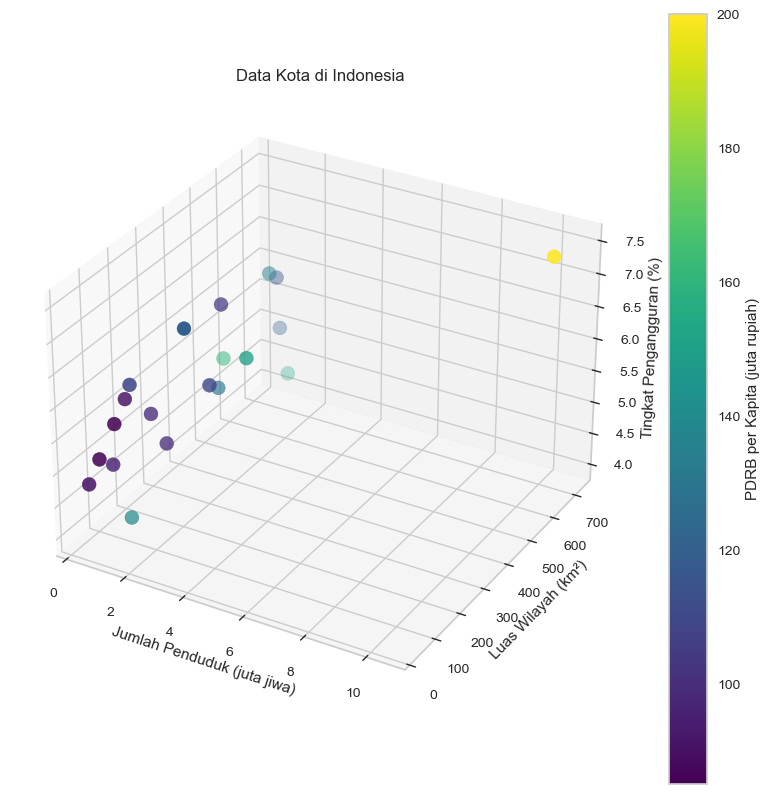

In [99]:
#MENAMPILKAN DATA SECARA VISUAL DALAM VECTOR SPACE 
#Ambil bagian data dari dataset 
# Mengkonversi data ke DataFrame
df = pd.DataFrame(data)
X = np.array(data.iloc[:, 1:4])   
#mengambil semua baris, khusus mulai kolom ke-1 dari 4 kolom 
print("Bagian data : ")
print(X) 
#Membuat grafik data 
# Asumsi data sudah ada dalam DataFrame df
x1 = np.array(df['Jumlah Penduduk (juta jiwa)'])  # Jumlah Penduduk
x2 = np.array(df['Luas Wilayah (km²)'])           # Luas Wilayah
x3 = np.array(df['Tingkat Pengangguran (%)'])     # Tingkat Pengangguran
x4 = np.array(df['PDRB per Kapita (juta rupiah)'])# PDRB per kapita (variabel ke-4)

# Membuat grafik 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Mendefinisikan label pada sumbu x, y, z
ax.set_xlabel('Jumlah Penduduk (juta jiwa)')
ax.set_ylabel('Luas Wilayah (km²)')
ax.set_zlabel('Tingkat Pengangguran (%)')

# Menggunakan variabel ke-4 (PDRB per Kapita) sebagai warna titik (c)
# Anda juga bisa menggunakan variabel ke-4 sebagai ukuran titik dengan parameter `s`
sc = ax.scatter(x1, x2, x3, c=x4, cmap='viridis', s=100)

# Menambahkan color bar untuk menjelaskan warna sesuai dengan PDRB per kapita
cbar = plt.colorbar(sc)
cbar.set_label('PDRB per Kapita (juta rupiah)')

# Atur ukuran figure
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.dpi"] = 100

# Menampilkan grafik
plt.title('Data Kota di Indonesia')
plt.show()

In [19]:
print(df.columns)

Index(['No', 'Kota', 'Jumlah Penduduk (juta jiwa)', 'Luas Wilayah (km²)',
       'Tingkat Pengangguran (%)', 'PDRB per Kapita (juta rupiah)'],
      dtype='object')


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

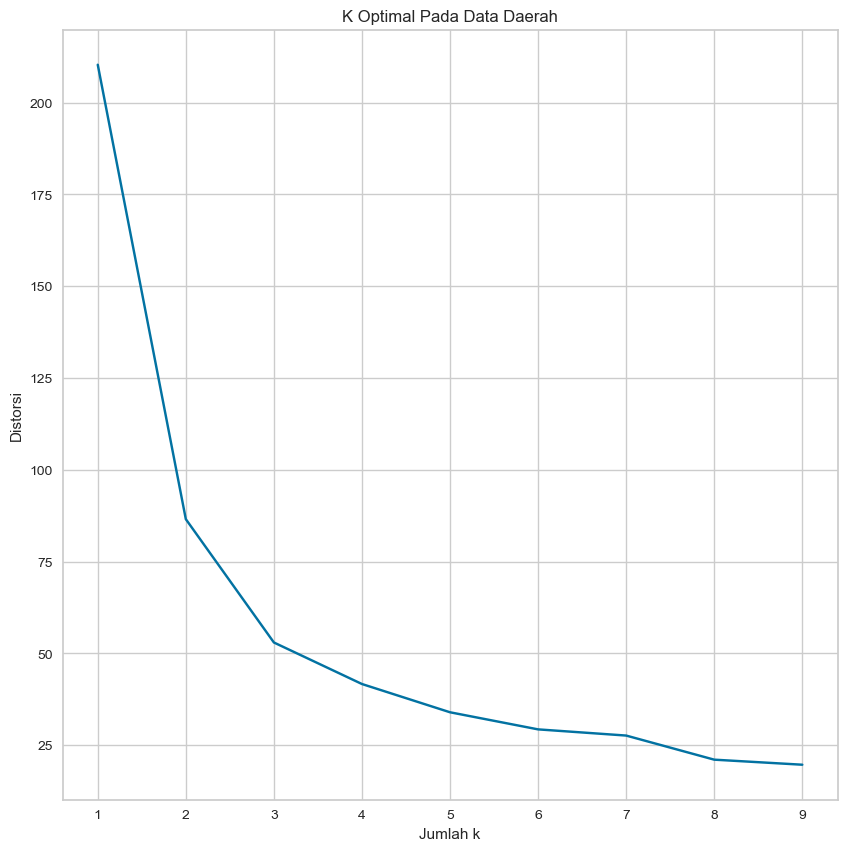

In [103]:
#Mencari jumlah K optimal pada kmeans dengan metode elbow
#Menentukan jumlah k terbaik
# Membuat variabel K dan array distortions
# Mengambil bagian data yang numerik (mulai dari kolom 'Jumlah Penduduk' hingga 'PDRB per Kapita')
# Menghapus kolom 'Kota' karena tidak diperlukan untuk clustering
X = df.drop(columns=['Kota']).values
distortions = []
K = range(1, 10)

# Mencari jumlah K optimal
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)  # n_clusters, bukan n_Cluster
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Menggambar elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Distorsi')
plt.title('K Optimal Pada Data Daerah')

# Mendefinisikan ukuran grafik dan font
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.size"] = 20

# Menampilkan grafik
plt.show()

In [157]:
from sklearn.metrics import silhouette_score

def silhouette(train_class):
    silhouette_scores = []
    
    # Loop untuk mencoba berbagai jumlah klaster
    for n_cluster in range(2, 6):  # Mencoba klaster dari 2 hingga 5
        kmeans = KMeans(n_clusters=n_cluster)  # Mengatur jumlah klaster
        labels = kmeans.fit_predict(train_class)
        
        # Menghitung silhouette score
        score = silhouette_score(train_class, labels)
        silhouette_scores.append(score)

    # Menemukan jumlah klaster dengan silhouette score terbaik
    max_score = silhouette_scores.index(max(silhouette_scores)) + 2
    
    return max_score

# Contoh panggilan fungsi (X adalah data numerik yang sudah disiapkan)
print('Cluster terbaik menurut Silhouette :', silhouette(X))

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster terbaik menurut Silhouette : 3


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

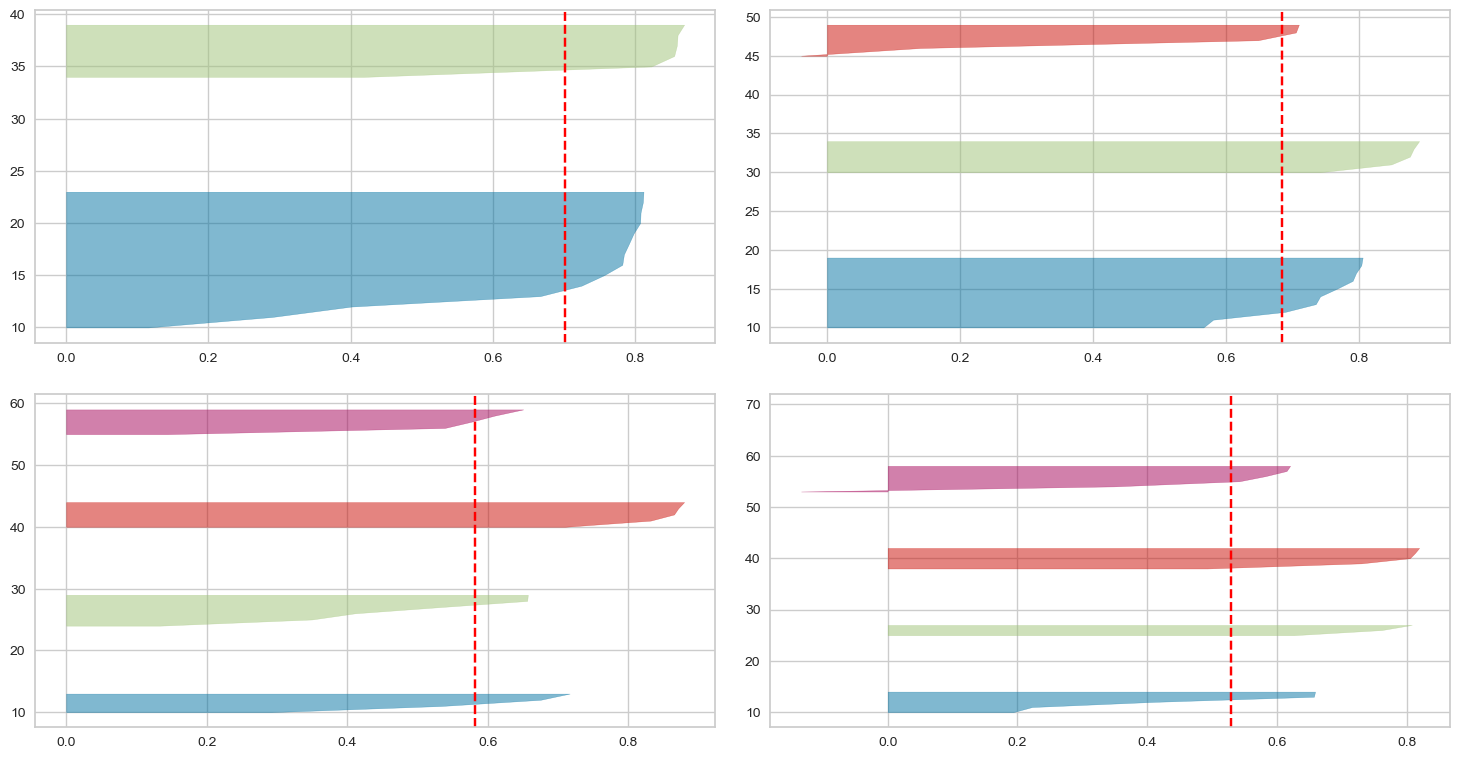

In [161]:
from yellowbrick.cluster import SilhouetteVisualizer 
fig, ax = plt.subplots(2, 2, figsize=(15, 8))  # Memperbaiki pemisahan baris
for i in [2, 3, 4, 5]: 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42) 
    q, mod = divmod(i, 2) 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(X) 

plt.tight_layout()  # Untuk memperbaiki layout grafik
plt.show()  # Menampilkan visualisasi

In [67]:
#Tahap Clustering K-Means¶ 
# Preprocessing: Normalisasi data dengan Min Max Scaler 
# Menghapus kolom 'Kota' karena tidak diperlukan untuk clustering
X = df.drop(columns=['Kota']).values
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(X) 
x_scaled

array([[0.        , 1.        , 0.91836735, 1.        , 1.        ],
       [0.05263158, 0.24752475, 0.46355685, 0.57142857, 0.56521739],
       [0.10526316, 0.20792079, 0.196793  , 0.85714286, 0.30434783],
       [0.15789474, 0.1980198 , 0.33965015, 0.51428571, 0.2173913 ],
       [0.21052632, 0.10891089, 0.24344023, 0.28571429, 0.13043478],
       [0.26315789, 0.12871287, 0.49708455, 0.37142857, 0.39130435],
       [0.31578947, 0.        , 0.        , 0.22857143, 0.04347826],
       [0.36842105, 0.11881188, 0.53644315, 0.71428571, 0.17391304],
       [0.42105263, 0.04950495, 0.13848397, 0.        , 0.47826087],
       [0.47368421, 0.02970297, 0.68658892, 0.34285714, 0.65217391],
       [0.52631579, 0.01980198, 0.09620991, 0.25714286, 0.08695652],
       [0.57894737, 0.01980198, 0.10932945, 0.42857143, 0.        ],
       [0.63157895, 0.06930693, 0.99562682, 0.08571429, 0.56521739],
       [0.68421053, 0.03960396, 0.16472303, 0.57142857, 0.2173913 ],
       [0.73684211, 0.03960396, 1.

In [69]:
# Membuat model K-means. Proses clustering disini 
model=KMeans(n_clusters=3,random_state=42).fit(x_scaled) 
 
# Menampilkan Pusat cluetering 
print(model.cluster_centers_)

[[0.44736842 0.11683168 0.65568513 0.49142857 0.38695652]
 [0.61403509 0.03520352 0.13524457 0.33015873 0.12560386]
 [0.         1.         0.91836735 1.         1.        ]]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
#Memberi label klister 
data['kluster'] = model.labels_
print(data)


    No            Kota  Jumlah Penduduk (juta jiwa)  Luas Wilayah (km²)  \
0    1         Jakarta                         10.5                 662   
1    2        Surabaya                          2.9                 350   
2    3         Bandung                          2.5                 167   
3    4           Medan                          2.4                 265   
4    5        Makassar                          1.5                 199   
5    6        Semarang                          1.7                 373   
6    7      Yogyakarta                          0.4                  32   
7    8       Palembang                          1.6                 400   
8    9        Denpasar                          0.9                 127   
9   10      Balikpapan                          0.7                 503   
10  11     Banjarmasin                          0.6                  98   
11  12       Pontianak                          0.6                 107   
12  13           Batam   

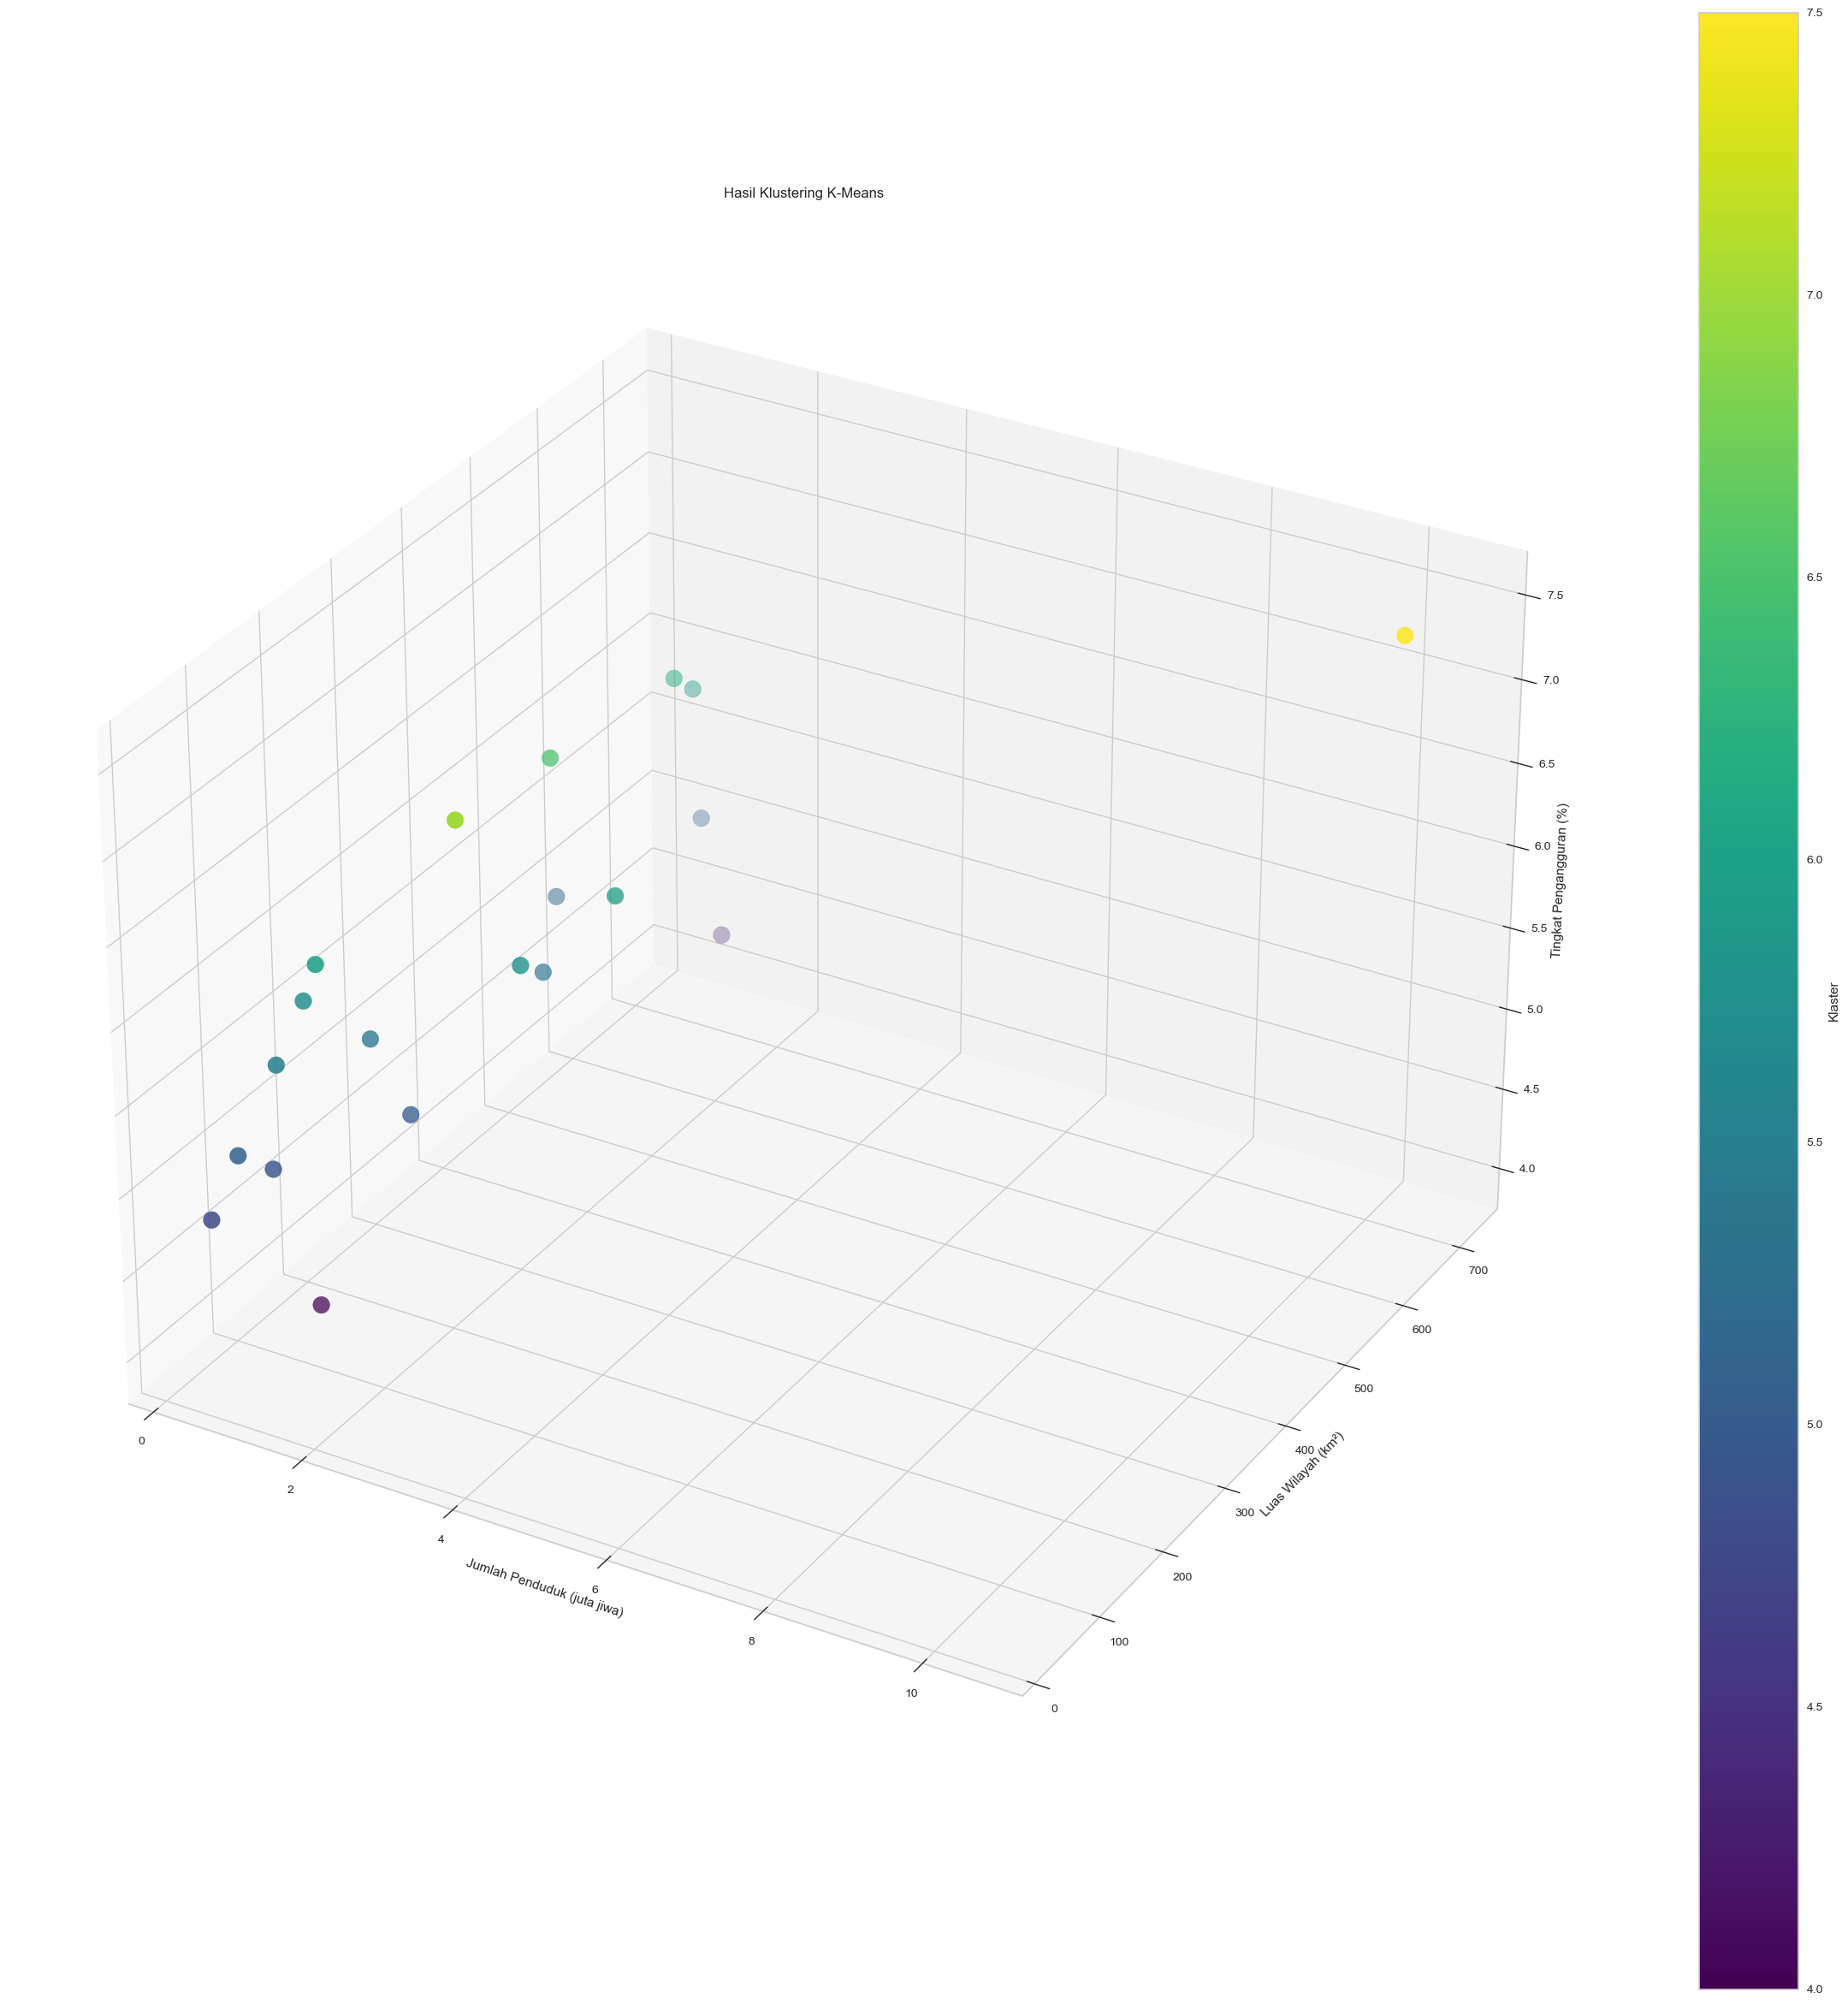

In [139]:
 
#Menampilkan visual cluster 
# 1. Memindah tiap kolom data ke variabel grafik 
x1 = np.array(df['Jumlah Penduduk (juta jiwa)'])  # Jumlah Penduduk
x2 = np.array(df['Luas Wilayah (km²)'])           # Luas Wilayah
x3 = np.array(df['Tingkat Pengangguran (%)'])     # Tingkat Pengangguran
klaster = np.array(data.iloc[:,4]) 
 
ax = plt.axes(projection ='3d') 
sc=ax.scatter(x1,x2,x3,s=200,c=klaster,cmap='viridis') 
ax.set_xlabel('Jumlah Penduduk (juta jiwa)')
ax.set_ylabel('Luas Wilayah (km²)')
ax.set_zlabel('Tingkat Pengangguran (%)')
cbar = plt.colorbar(sc) 
cbar.set_label("Klaster") 
plt.rcParams["figure.figsize"] = (30, 30) 
plt.rcParams["figure.dpi"] = 100 
plt.title('Hasil Klustering K-Means') 
plt.show() 